In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from google.colab import files

In [11]:
#loading merged data path
merged_df_path = '/content/drive/MyDrive/merged_df.csv'
merged_df = pd.read_csv(merged_df_path)

time_periods = [(1994, 2004), (2004, 2014), (2014, 2024)]

**Random Forest Time Series with 1 month Lag**

In [12]:
#1 month lag
results = []

for start_year, end_year in time_periods:
    period_data = merged_df[(merged_df['year'] >= start_year) & (merged_df['year'] < end_year)].copy()

    #fish model
    X_fish = period_data[['temp_lag1', 'spawners']]
    y_fish = period_data[['runsize']]
    X_train_fish, X_test_fish, y_train_fish, y_test_fish = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 42)
    model_fish = RandomForestRegressor()
    model_fish.fit(X_train_fish, y_train_fish)
    y_pred_fish = model_fish.predict(X_test_fish)
    fish_r2 = r2_score(y_test_fish, y_pred_fish)
    period_data['predicted_fish_availability'] = model_fish.predict(X_fish)

    #osprey model
    X_osprey = period_data[['predicted_fish_availability', 'temp_lag1']]
    y_osprey = period_data['osprey_count']
    X_train_osprey, X_test_osprey, y_train_osprey, y_test_osprey = train_test_split(X_osprey, y_osprey, test_size = 0.2, random_state = 42)
    model_osprey = RandomForestRegressor()
    model_osprey.fit(X_train_osprey, y_train_osprey)
    y_pred_osprey = model_osprey.predict(X_test_osprey)
    osprey_r2 = r2_score(y_test_osprey, y_pred_osprey)

    #bald eagle model
    X_eagle = period_data[['predicted_osprey_count', 'predicted_fish_availability', 'temp_lag1']]
    y_eagle = period_data['bald_eagle_count']
    X_train_eagle, X_test_eagle, y_train_eagle, y_test_eagle = train_test_split(X_eagle, y_eagle, test_size = 0.2, random_state = 42)
    model_eagle = RandomForestRegressor()
    model_eagle.fit(X_train_eagle, y_train_eagle)
    y_pred_eagle = model_eagle.predict(X_test_eagle)
    eagle_r2 = r2_score(y_test_eagle, y_pred_eagle)

    #results
    results.append({
        'start_year': start_year,
        'end_year': end_year,
        'fish_r2': fish_r2,
        'osprey_r2': osprey_r2,
        'eagle_r2': eagle_r2
    })

results_df = pd.DataFrame(results)[1:3]
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   start_year  end_year   fish_r2  osprey_r2  eagle_r2
1        2004      2014  0.998601   0.932889  0.416883
2        2014      2024  0.998477   0.742444  0.874831


**Random Forest Time Series with 2 month Lag**

In [13]:
#2 month lag
results = []

for start_year, end_year in time_periods:
    period_data = merged_df[(merged_df['year'] >= start_year) & (merged_df['year'] < end_year)].copy()

    #fish model
    X_fish = period_data[['temp_lag2', 'spawners']]
    y_fish = period_data[['runsize']]
    X_train_fish, X_test_fish, y_train_fish, y_test_fish = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 42)
    model_fish = RandomForestRegressor()
    model_fish.fit(X_train_fish, y_train_fish)
    y_pred_fish = model_fish.predict(X_test_fish)
    fish_r2 = r2_score(y_test_fish, y_pred_fish)
    period_data['predicted_fish_availability'] = model_fish.predict(X_fish)

    #osprey model
    X_osprey = period_data[['predicted_fish_availability', 'temp_lag2']]
    y_osprey = period_data['osprey_count']
    X_train_osprey, X_test_osprey, y_train_osprey, y_test_osprey = train_test_split(X_osprey, y_osprey, test_size = 0.2, random_state = 42)
    model_osprey = RandomForestRegressor()
    model_osprey.fit(X_train_osprey, y_train_osprey)
    y_pred_osprey = model_osprey.predict(X_test_osprey)
    osprey_r2 = r2_score(y_test_osprey, y_pred_osprey)

    #bald eagle model
    X_eagle = period_data[['predicted_osprey_count', 'predicted_fish_availability', 'temp_lag2']]
    y_eagle = period_data['bald_eagle_count']
    X_train_eagle, X_test_eagle, y_train_eagle, y_test_eagle = train_test_split(X_eagle, y_eagle, test_size = 0.2, random_state = 42)
    model_eagle = RandomForestRegressor()
    model_eagle.fit(X_train_eagle, y_train_eagle)
    y_pred_eagle = model_eagle.predict(X_test_eagle)
    eagle_r2 = r2_score(y_test_eagle, y_pred_eagle)
    period_data['predicted_bald_eagle_count'] = model_eagle.predict(X_eagle)

    #results
    results.append({
        'start_year': start_year,
        'end_year': end_year,
        'fish_r2': fish_r2,
        'osprey_r2': osprey_r2,
        'eagle_r2': eagle_r2
    })

results_df = pd.DataFrame(results)[1:3]
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   start_year  end_year   fish_r2  osprey_r2  eagle_r2
1        2004      2014  0.996688   0.902604  0.475515
2        2014      2024  0.999900   0.853463  0.795225


**Random Forest Time Series with 3 month Lag**

In [14]:
#3 month lag
results = []

for start_year, end_year in time_periods:
    period_data = merged_df[(merged_df['year'] >= start_year) & (merged_df['year'] < end_year)].copy()

    #fish model
    X_fish = period_data[['temp_lag3', 'spawners']]
    y_fish = period_data[['runsize']]
    X_train_fish, X_test_fish, y_train_fish, y_test_fish = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 42)
    model_fish = RandomForestRegressor()
    model_fish.fit(X_train_fish, y_train_fish)
    y_pred_fish = model_fish.predict(X_test_fish)
    fish_r2 = r2_score(y_test_fish, y_pred_fish)
    period_data['predicted_fish_availability'] = model_fish.predict(X_fish)

    #osprey model
    X_osprey = period_data[['predicted_fish_availability', 'temp_lag3']]
    y_osprey = period_data['osprey_count']
    X_train_osprey, X_test_osprey, y_train_osprey, y_test_osprey = train_test_split(X_osprey, y_osprey, test_size = 0.2, random_state = 42)
    model_osprey = RandomForestRegressor()
    model_osprey.fit(X_train_osprey, y_train_osprey)
    y_pred_osprey = model_osprey.predict(X_test_osprey)
    osprey_r2 = r2_score(y_test_osprey, y_pred_osprey)

    #bald eagle model
    X_eagle = period_data[['predicted_osprey_count', 'predicted_fish_availability', 'temp_lag3']]
    y_eagle = period_data['bald_eagle_count']
    X_train_eagle, X_test_eagle, y_train_eagle, y_test_eagle = train_test_split(X_eagle, y_eagle, test_size = 0.2, random_state = 42)
    model_eagle = RandomForestRegressor()
    model_eagle.fit(X_train_eagle, y_train_eagle)
    y_pred_eagle = model_eagle.predict(X_test_eagle)
    eagle_r2 = r2_score(y_test_eagle, y_pred_eagle)
    period_data['predicted_bald_eagle_count'] = model_eagle.predict(X_eagle)

    #results
    results.append({
        'start_year': start_year,
        'end_year': end_year,
        'fish_r2': fish_r2,
        'osprey_r2': osprey_r2,
        'eagle_r2': eagle_r2
    })

results_df = pd.DataFrame(results)[1:3]
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   start_year  end_year   fish_r2  osprey_r2  eagle_r2
1        2004      2014  0.999934   0.869378  0.451257
2        2014      2024  0.999552   0.695985  0.744330


**Random Forest Time Series with 3 month Rolling Average**

In [15]:
#3 month rolling average
results = []

for start_year, end_year in time_periods:
    period_data = merged_df[(merged_df['year'] >= start_year) & (merged_df['year'] < end_year)].copy()

    #fish model
    X_fish = period_data[['temp_roll3', 'spawners']]
    y_fish = period_data[['runsize']]
    X_train_fish, X_test_fish, y_train_fish, y_test_fish = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 42)
    model_fish = RandomForestRegressor()
    model_fish.fit(X_train_fish, y_train_fish)
    y_pred_fish = model_fish.predict(X_test_fish)
    fish_r2 = r2_score(y_test_fish, y_pred_fish)
    period_data['predicted_fish_availability'] = model_fish.predict(X_fish)

    #osprey model
    X_osprey = period_data[['predicted_fish_availability', 'temp_roll3']]
    y_osprey = period_data['osprey_count']
    X_train_osprey, X_test_osprey, y_train_osprey, y_test_osprey = train_test_split(X_osprey, y_osprey, test_size = 0.2, random_state = 42)
    model_osprey = RandomForestRegressor()
    model_osprey.fit(X_train_osprey, y_train_osprey)
    y_pred_osprey = model_osprey.predict(X_test_osprey)
    osprey_r2 = r2_score(y_test_osprey, y_pred_osprey)

    #bald eagle model
    X_eagle = period_data[['predicted_osprey_count', 'predicted_fish_availability', 'temp_roll3']]
    y_eagle = period_data['bald_eagle_count']
    X_train_eagle, X_test_eagle, y_train_eagle, y_test_eagle = train_test_split(X_eagle, y_eagle, test_size=0.2, random_state=42)
    model_eagle = RandomForestRegressor()
    model_eagle.fit(X_train_eagle, y_train_eagle)
    y_pred_eagle = model_eagle.predict(X_test_eagle)
    eagle_r2 = r2_score(y_test_eagle, y_pred_eagle)
    period_data['predicted_bald_eagle_count'] = model_eagle.predict(X_eagle)

    #results
    results.append({
        'start_year': start_year,
        'end_year': end_year,
        'fish_r2': fish_r2,
        'osprey_r2': osprey_r2,
        'eagle_r2': eagle_r2
    })

results_df = pd.DataFrame(results[1:3])
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   start_year  end_year   fish_r2  osprey_r2  eagle_r2
0        2004      2014  0.986698   0.924807  0.445145
1        2014      2024  0.998478   0.812999  0.838065


**Competition Graph**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


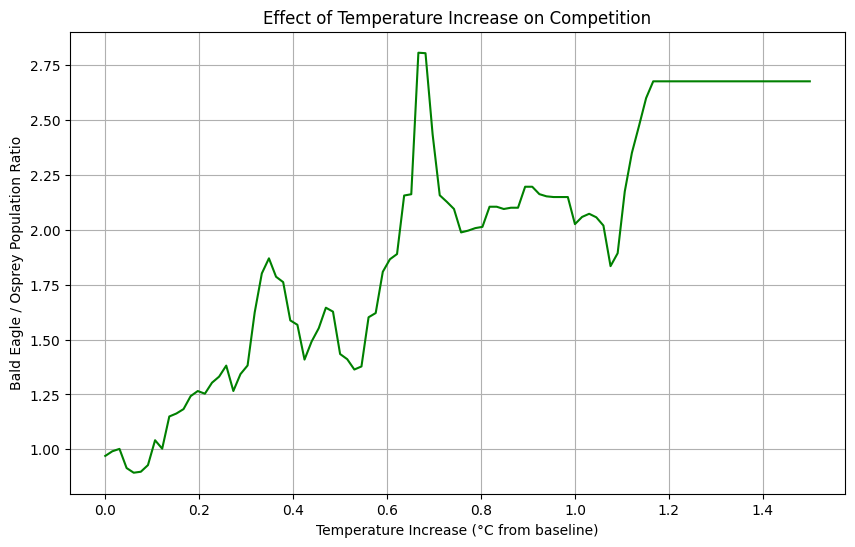

In [18]:
baseline_temp = merged_df['temp_roll3'].mean()

#simulate a temperature increase from 0 to 1.5°C above baseline
temperature_increase = np.linspace(0, 1.5, 100)
temperature_range = baseline_temp + temperature_increase

spawners_fixed = merged_df['spawners'].mean()
fish_availability_range = model_fish.predict(
    np.column_stack([temperature_range, np.ones_like(temperature_range) * spawners_fixed])
)

X_sim_osprey = np.column_stack([fish_availability_range, temperature_range])
osprey_pred = model_osprey.predict(X_sim_osprey)

interaction = fish_availability_range * osprey_pred
X_sim_eagle = np.column_stack([interaction, fish_availability_range, osprey_pred])
eagle_pred = model_eagle.predict(X_sim_eagle)

#competition ratio
population_ratio = eagle_pred / osprey_pred

#plot
plt.figure(figsize = (10,6))
plt.plot(temperature_increase, population_ratio, color = 'g')
plt.xlabel("Temperature Increase (°C from baseline)")
plt.ylabel("Bald Eagle / Osprey Population Ratio")
plt.title("Effect of Temperature Increase on Competition")
plt.grid(True)
plt.show()